In [17]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

# Find the distributions as a function of t (abstract over number of time steps)
# I also want to see state paths that are generated (2d graph against time)
# Find distributions abstracted over values of a
# Find distributions abstracted over initial state?
# Find distributions abstracted over spread of noise, and maybe mean?

D = 0
x0 = 50
history = [x0]
a = 8
a_hat = 0
T = 100
sigma = 1
a_hat_history = [a_hat]

def num_calc(arr):
    sum = 0
    for i in range(len(arr)-1):
        sum = sum + arr[i] * arr[i+1]
    return sum

def a_hat_update():
    denom = reduce(lambda x, y: x + y**2, history, 0) - history[-1]**2
    #print('denom', denom)
    num = num_calc(history)
    #print('num', num)
    return num/denom

for i in range(T):
    x_new = (a-a_hat) * history[-1] + np.random.normal(scale=sigma) + D
    history.append(x_new)
    a_hat = a_hat_update()
    a_hat_history.append(a_hat)

The estimated value appears to converge to half the actual value. That's weird! Why?

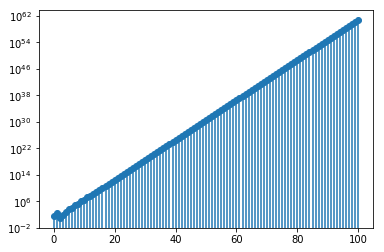

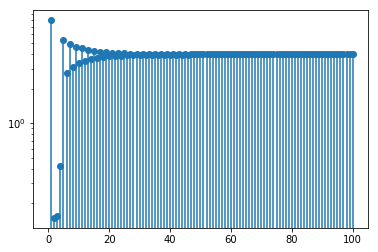

In [18]:
plt.stem(np.abs(history))
plt.yscale('log')

plt.figure()
plt.stem(np.abs(a_hat_history))
plt.yscale('log')